<a href="https://colab.research.google.com/github/WarwickAI/natural-selection-sim/blob/main/Lesson6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
    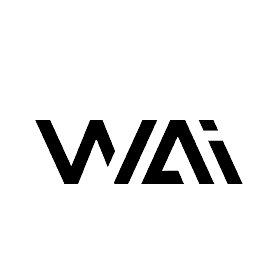
</p>

# Lesson 6 - The grand finale!
Over the past few weeks, we learned about a number of concepts.
In Lesson 5, we have also written an Entity class which will be used in
the simulation to handle our entities.

In this lesson, we will write some of the remaining functions so that we have a fully working simulation.

In [ ]:
import sys
import random
import uuid

from IPython.display import clear_output


class Color:
    RESET = '\033[0m'
    RED = '\033[91m'
    GREEN = '\033[92m'
    BLUE = '\033[94m'
    CYAN = '\033[36m'
    YELLOW = '\033[33m'
    WHITE = '\033[37m'


class Simulation:
    max_x = 20
    max_y = 20

    def __init__(self, max_x, max_y, seed):
        self.seed = seed
        self.max_x = max_x
        self.max_y = max_y

        random.seed(seed)

    def do_cycles(self, num_moves, display=True):
        '''
        Exercise 1
        ==========================================
        Complete this method so that it "ticks"
        each entity if it is active using the
        Entity.tick() method.
        Additionally, if `display` is true,
        then you should also clear the output
        using the `clear_output` function,
        print the map of the simulation
        using the `display` function defined in this
        class, and ask for user input using `input()`.

        This method should repeat the process repeated
        above `num_moves` times.
        '''
        pass

    def display_cells_info(self):
        total_sense_distance = 0
        num_alive_cells = 0

        for entity in Entity.entities:
            if type(entity) is Cell:
                if entity.is_active:
                    '''
                    Exercise 2
                    ==========================================
                    Complete this section so that the information of a cell
                    is printed, the number of alive cells is incremented
                    and the total sense distance is updated.
                    '''

        avg_sense_distance = total_sense_distance / num_alive_cells

        print()
        print(f"{Color.CYAN}Displaying Cell information:{Color.RESET}")
        print()

        print("There are currently " + Color.CYAN +
              str(num_alive_cells) + Color.RESET + " living Cells")
        print("The average sense distance is " + Color.CYAN +
              str(avg_sense_distance) + Color.RESET)

    def build_entity_location_dict(self):
        entities = {}

        for entity in Entity.entities:
            if entity.is_active:
                entities[entity.get_location()] = entity
        
        return entities

    def display(self):
        entity_location = self.build_entity_location_dict()
        map_text = ""

        '''
        Exercise 3
        ==========================================
        Complete this function so that it iterates over all
        valid coordinates, checks if an entity exists
        in each coordinate and adds the entity symbol.
        If no entity exists, add the string " _".
        '''

        for y in range(1, self.max_y + 1):
            map_text += "\n"
            for x in range(1, self.max_x + 1):
                # Complete the code here
                pass

        print(map_text + Color.RESET + "\n")


class Entity:
    entities = []

    def __init__(self, x, y):
        self.entities.append(self)

        self.id = uuid.uuid4()
        self.is_active = True
        self.x = x
        self.y = y

    def die(self):
        self.is_active = False

    def get_location(self):
        return (self.x, self.y)

    def translate_by(self, dx, dy):
        self.x += dx
        self.y += dy

    def manh_distance_to(self, entity):
        target_x, target_y = entity.get_location()

        return abs(self.x - target_x) + abs(self.y - target_y)

    def get_closest_entity(self, of_type, max_distance=200):
        min_entity = None
        min_distance = 9999999

        for entity in self.entities:
            if type(entity) is of_type and entity.is_active:
                distance = self.manh_distance_to(entity)

                if distance < min_distance and distance <= max_distance:
                    min_distance = distance
                    min_entity = entity
        
        return min_entity, min_distance        

    def move_close_to(self, entity):
        target_x, target_y = entity.get_location()

        if target_x > self.x:
            self.translate_by(1, 0)
        elif target_x < self.x:
            self.translate_by(-1, 0)
        elif target_y > self.y:
            self.translate_by(0, 1)
        else:
            self.translate_by(0, -1)

    def tick(self):
        pass

    def get_symbol(self):
        pass


class Food(Entity):
    def __init__(self, x, y):
        super().__init__(x, y)

        self.energy = 10

    def get_energy(self):
        return self.energy

    def get_symbol(self):
        return Color.GREEN + " o"


class Cell(Entity):
    def __init__(self, generation, x, y, energy, sense_distance):
        super().__init__(x, y)

        self.generation = generation
        self.energy = energy
        self.sense_distance = sense_distance
        self.total_moves = 0

        '''
        Exercise 4
        ==========================================
        Modify this method so that the cell mutates
        with 50% chance.
        '''

    def get_symbol(self):
        return Color.RED + " @"

    def display_info(self):
        info = ("Cell ID: " + str(self.id))
        info += (" | Energy: " + str(self.energy))
        info += (" | XY: " + "(" + str(self.x) + ", " + str(self.y) + ")")
        info += (" | Sense Distance: " + str(self.sense_distance))
        info += (" | Moves: " + str(self.total_moves))
        info += (" | Status: " + "Alive" if self.is_active else "Dead")

        return info

    def move_random(self):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])

        while not (0 < self.x + dx <= Simulation.max_x and 0 < self.y + dy <= Simulation.max_y):
            dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])

        self.translate_by(dx, dy)

    def tick(self, directed=False):
        nearest_food, distance = self.get_closest_entity(Food, max_distance=self.sense_distance)

        '''
        Exercise 5
        ==========================================
        This method implements the behaviour of the cell.

        Complete it so that:

        1.) If no piece of food is found nearby `nearest_food`,
            the Cell moves at random using `move_random`.
            Otherwise, move closer to the piece of food,
            and if the distance to the piece of food is 1,
            the cell should also eat it.
        2.) After that, the total number of moves of the cell should be increased,
            and its energy reduced by 1.
        3.) If the energy of the cell is 0 or less, then the cell should die.
            Otherwise, if it's greater than or equal to 100, it should reproduce.
        4.) Finally, if the total moves of a cell is greater than 100, the cell should also die.
        '''

    def eat(self, food):
        self.energy += food.get_energy()
        food.die()

    def mutate(self):
        change = random.choice([-1, 1])
        if self.sense_distance + change >= 1:
            self.sense_distance += change

    def reproduce(self):
        if self.y < Simulation.max_y:
            spawn_y = self.y + 1
            spawn_x = self.x
        elif self.x < Simulation.max_x:
            spawn_x = self.x + 1
            spawn_y = self.y
        else:
            spawn_x = self.x - 1
            spawn_y = self.y - 1

        '''
        Exercise 6
        ==========================================
        This method is responsible for the cell reproduction.
        
        Complete it so that a new Cell is spawned,
        with its generation increased by 1, coordinates
        spawn_x and spawn_y, 50 units of energy,
        and the same sense distance as the current cell.

        Additionally, 50 units of energy should be removed from the current cell.
        '''


def add_food(num_food, verbose=False):
    for i in range(1, num_food + 1):
        x, y = random.randint(1, Simulation.max_x), random.randint(1, Simulation.max_y)
        Food(x, y)

    if verbose:
        print("\nAdding " + str(num_food) + " food")

def create_cells(num_cells, verbose=False):
    for i in range(1, num_cells + 1):
        x, y = random.randint(1, Simulation.max_x), random.randint(1, Simulation.max_y)
        Cell(0, x, y, 30, 3)

    if verbose:
        print("Adding " + str(num_cells) + " cells")


if __name__ == '__main__':
    simulation = Simulation(20, 20, seed="WAI")
    add_food(100)
    create_cells(5)

    # Begin menu display
    exit = False
    while not exit:
        print("\n" + Color.BLUE + "▄" * 50 + "\n" + Color.RESET)

        print(f"{Color.CYAN}Cell Natural Selection Simulation{Color.RESET}\n")

        print("1) Add a Cell")
        print("2) Add Food")
        print("3) See Cell Info")
        print("4) View Map")
        print("x) Begin Evolution Cycle")
        print("\n" + Color.BLUE + "▀" * 50 + "\n" + Color.RESET)

        val = input("Press a key: ")
        if val == "1":
            create_cells(1, verbose=True)
        elif val == "2":
            add_food(10, verbose=True)
        elif val == "3":
            simulation.display_cells_info()
        elif val == "4":
            simulation.display()
        elif val == "x":
            print("Beginning evolution cycle")
            simulation.do_cycles(100)
        elif val == "q":
            print("Exiting")
            exit = True

        input()